In [54]:
import shapefile
import os
import earthpy as et
import pandas as pd
import fiona
import pyproj
from pyproj import CRS
import numpy as np

In [10]:
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA', 'Urban_Heat', 'CUSSH', 'City_Area'))

In [ ]:
sf = shapefile.Reader('Morphological_Urban_Area.shp')

In [18]:
import geopandas as gpd
shapefile = gpd.read_file("Morphological_Urban_Area.shp")
print(shapefile)

      OBJECTID  FID_1                         Aggname        Area     X2016  \
0            1    1.0                        Winnipeg  476.219088   765.850   
1            2    2.0                         Calabar  141.186185   487.705   
2            3    3.0                           Anqiu  142.614875   522.101   
3            4    4.0                         Maracay  337.575116  1186.158   
4            6    6.0  Tel Aviv-Yafo (Tel Aviv-Jaffa)  783.070329  3661.189   
...        ...    ...                             ...         ...       ...   
1564      1566  361.0                  FlorianÃ³polis  270.565359  1212.376   
1565      1567  357.0                            FÃ¨s  161.723642  1196.538   
1566      1568  959.0                San Luis PotosÃ­  302.613824  1167.758   
1567      1569  585.0                 KÃ¶ln (Cologne)  103.709743  1041.936   
1568      1570  652.0                           LomÃ©  333.072800   984.904   

      Cntry_C                                 Cntry

In [91]:
os.chdir(os.path.join(et.io.HOME, 'Documents', 'UEA', 'Urban_Heat', 'CUSSH', 'City_Area','Administrative' ))
uk_sf = gpd.read_file("gadm36_GBR_2.shp")
print(uk_sf)

    GID_0          NAME_0    GID_1   NAME_1 NL_NAME_1       GID_2  \
0     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.1_1   
1     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.2_1   
2     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.3_1   
3     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.4_1   
4     GBR  United Kingdom  GBR.1_1  England      None   GBR.1.5_1   
..    ...             ...      ...      ...       ...         ...   
178   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.18_1   
179   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.19_1   
180   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.20_1   
181   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.21_1   
182   GBR  United Kingdom  GBR.4_1    Wales      None  GBR.4.22_1   

                           NAME_2                        VARNAME_2 NL_NAME_2  \
0                        Barnsley                             None      None   
1    Bath a

In [92]:
uk_sf[uk_sf["NAME_2"] == 'Greater London'].geometry

35    POLYGON ((0.16627 51.39856, 0.16917 51.38861, ...
Name: geometry, dtype: geometry

In [93]:
City_Lat = 51.51279
City_Lon = -0.09184
#function for finding the UTM projection
def utm_zoner(lon, lat):
    utm_lon = lon+180
    utm_zone = int(np.ceil(utm_lon/6))
    south_hem =''
    if lat<0:
        south_hem = ' +south'
    proj_str = f'+proj=utm +zone={utm_zone}{south_hem}'
    return proj_str

#Get the UTM of the city
local_utm = CRS.from_proj4(utm_zoner(City_Lon, City_Lat))
local_epsg = local_utm.to_epsg()

In [94]:
local_epsg

32630

In [78]:
#set the CRS 
uk_sf= uk_sf.to_crs({'init': 'epsg:3857'})

C:\Anaconda3\envs\project_environment\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [ ]:
uk_sf2['geometry'].area/ 10**6

In [95]:
#change crs to local
uk_sf2 = uk_sf.to_crs(epsg=27700).copy()

In [96]:
#calculate area
uk_sf2["area"] = uk_sf2['geometry'].area/ (10**6)

In [97]:
uk_sf2[uk_sf2["NAME_2"] == 'Greater London']

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,ENGTYPE_2,CC_2,HASC_2,geometry,area
35,GBR,United Kingdom,GBR.1_1,England,None,GBR.1.36_1,Greater London,None,None,Region,Region,None,GB.GL,"POLYGON ((550791.609 168839.889, 551025.836 16...",1611.203977


In [79]:
uk_sf_3 = uk_sf['geometry'].to_crs({'init': 'epsg:32630'})\
               .map(lambda p: p.area / 10**6)

In [81]:
uk_sf_3[109]

2.541995791073866

<AxesSubplot:>

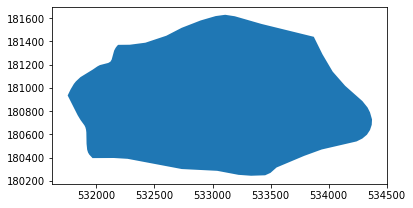

In [85]:
uk_sf2[uk_sf2["NAME_3"] == 'London'].plot()